# House Market

Let's go a little further into python.

1. Download the four files “superficie.csv” / “nombre_de_sdb.csv” / “nombre_de_chambres.csv” / "house_price.csv"

2. Read the files and create the 4 corresponding Dataframes


In [40]:
import pandas as pd

In [42]:
!pip3 install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.9/158.9 kB 2.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 2.6 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.6/242.6 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 2.7 MB/s eta 0:00:00a 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 14.9 MB/s eta 0:00:00


In [43]:
import seaborn as sns

In [6]:
df_superficie = pd.read_csv("src/superficie.csv", names= ['id','superficie'])
df_nb_de_sdb = pd.read_csv("src/nombre_de_sdb.csv", names= ['id','sdb'])
df_nb_de_chambres = pd.read_csv("src/nombre_de_chambres.csv",names= ['id','chambres'])
df_house_price = pd.read_csv("src/house_price.csv")


In [15]:
df_superficie.head(5)

,id,superficie
0,0,28844
1,1,27667
2,2,14742
3,3,28089
4,4,11713


In [16]:
df_nb_de_sdb.head(5)

,id,sdb
0,0,2
1,1,1
2,2,1
3,3,3
4,4,1


In [17]:
df_nb_de_chambres.head(3)

,id,chambres
0,0,1
1,1,4
2,2,1


In [18]:
df_house_price.head(5)

,Unnamed: 0,id,house_price
0,0,14,1918154.0
1,1,30,739142.0
2,2,70,1621938.0
3,3,77,1319862.0
4,4,50,146250.0


3. Give a column name to the three datasets that don't have a header in the source file
#jai ajouté à l'import du fichier csv, names= ['id','sdb']

4. Make an inner join of these four datasets into a single dataframe. 

In [20]:
df = df_superficie.merge(df_nb_de_sdb).merge(df_nb_de_chambres).merge(df_house_price)
df.head(5)

,id,superficie,sdb,chambres,Unnamed: 0,house_price
0,0,28844,2,1,32,1421908.0
1,1,27667,1,4,71,1305091.0
2,2,14742,1,1,65,164373.0
3,3,28089,3,4,88,1441714.0
4,4,11713,1,2,49,108290.0


5. What is the average surface area of the houses in our dataset?

In [21]:
#dataset.groupby('item_name')['quantity'].sum().sort_values(ascending=False)
df['superficie'].mean()

20439.77

6. What is the median and average number of rooms?

In [24]:
print("The average number of room is {}, and the median number is {}".format(df['chambres'].mean(),df['chambres'].median()))

#df['chambres'].mean()

#df['chambres'].median()

The average number of room is 2.42, and the median number is 2.0


2.0

7. What is the average cost of a house?

In [26]:
print("the average cost of a house is {} dollars".format(df['house_price'].mean()))

the average cost of a house is 767747.87 dollars


8. What is the average cost of a house, depending on the number of rooms it has?

In [27]:
df.groupby('chambres')['house_price'].mean()

chambres
1    980774.869565
2    642086.258065
3    645904.592593
4    888045.631579
Name: house_price, dtype: float64

10. The average cost per room doesn't tell us much. Let's try to categorize by size.

  - Create a new column in your dataset that we'll call home_size
Create three categories that respectively correspond to :

      - "very large" == "a house larger than 25,000 sqrt_feet"
      
      - "large" == "a house between 20,000 and 25,000 sqrt_feet"
      
      - "medium" == "a house between 15,000 and 20,000 sqrt_feet"
    
      - "small" == "a house between 10,000 and 15,000 sqrt_feet" 
    
      - "very small" == a house less than 10,000 sqrt_feet"
      
Fill in the corresponding rows in the house_size column.

In [36]:
df['home_size'] = df['superficie'].apply(lambda x : 'very large' if x > 25000
                                       else 'large' if (x > 20000) and (x <= 25000)
                                       else 'medium' if (x > 15000) and (x <= 20000)                                 
                                        else 'small' if (x > 10000) and (x <= 15000)           
                                        else 'very small')
                                                     
display(df)


,id,superficie,sdb,chambres,Unnamed: 0,house_price,home_size
0,0,28844,2,1,32,1421908.0,very large
1,1,27667,1,4,71,1305091.0,very large
2,2,14742,1,1,65,164373.0,small
3,3,28089,3,4,88,1441714.0,very large
4,4,11713,1,2,49,108290.0,small
...,...,...,...,...,...,...,...
95,95,11417,3,3,39,132599.0,small
96,96,12126,1,2,15,155828.0,small
97,97,16390,1,2,13,237061.0,medium
98,98,23738,1,2,9,976422.0,large


In [48]:
#dataset['home_size'] = pd.cut(dataset['surface'],
                         #bins=[0, 10000, 15000, 20000, 25000, float('inf')],
                         #labels=['very small', 'small', 'medium', 'large', 'very large'])
                         
#ou sinon
#def categorie(x):
    #if x < 10000:
        #return "very small"
   # elif 10000 <= x < 15000:
        #return "small"
    #elif 15000 < x <= 20000:
        #return "medium"
    #elif 20000 < x <= 25000:
        #return "large"
    #else:
        #return "very large"

#df["home_size"] = df["superficie"].apply(lambda x: categorie(x))

#OU sinon
#cat=["Very Large", "Large", "Medium", "Small", "Very Small"]

#def category(x):
    #if x >= 25000:
        #return cat[0]
    #elif x >= 20000 and x < 25000:
        #return cat[1]
    #elif x >= 15000 and x < 20000:
        #return cat[2]
    #elif x >= 10000 and x < 15000:
        #return cat[3]
    #else:
        #return cat[4]

##df["house_size"] = df["surface"].apply(lambda x: category(x))
#df

11. What is the average cost of a house depending on its size category?


In [38]:
df.groupby('home_size')['house_price'].mean()

home_size
large         7.325385e+05
medium        3.256948e+05
small         1.561387e+05
very large    1.552456e+06
Name: house_price, dtype: float64

 12. Apply the code below to view your result. What can you conclude?

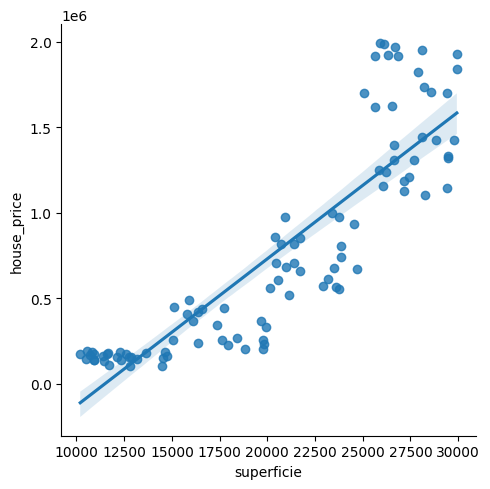

In [46]:
#import seaborn as sns
%matplotlib inline
sns.lmplot(x = "superficie", y="house_price", data= df)